<a href="https://colab.research.google.com/github/datumorphism/ml4everyone/blob/master/linear_regression_with_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Packages

In [0]:
import pandas as pd
import numpy as np

import seaborn as sns
from urllib.request import urlretrieve

import matplotlib.pyplot as plt
FIG_SIZE = (10,6.18)

## Load Data

We will download a csv file from a remote URL and save it as`/tmp/gm_region.csv`

In [0]:
data_url = 'https://gist.githubusercontent.com/emptymalei/7a06636255e6742a3f0d146bb2e82513/raw/7bb6fa7e9878217873b5d705a2cff4de3c3e851c/gm_2008_region.csv'
data_file_path = '/tmp/gm_region.csv'

urlretrieve(data_url, data_file_path)


('/tmp/gm_region.csv', <http.client.HTTPMessage at 0x7fbb201dd0f0>)

The csv data file can be easily loaded to python using `pandas`.

In [0]:
df = pd.read_csv(data_file_path)

Before our deep dive into the model, we will explore the dataset a little bit just to understand what we are dealing with.

In [0]:
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [0]:
df.describe()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
count,1.390000e+02,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,3.549977e+07,3.005108,1.915612,4.459874,24.623054,16638.784173,126.701914,69.602878,45.097122
std,1.095121e+08,1.615354,4.408974,6.268349,2.209368,19207.299083,4.471997,9.122189,45.724667
min,2.773150e+05,1.280000,0.060000,0.008618,20.397420,588.000000,117.375500,45.200000,2.700000
25%,3.752776e+06,1.810000,0.100000,0.496190,22.448135,2899.000000,123.232200,62.200000,8.100000
50%,9.705130e+06,2.410000,0.400000,2.223796,25.156990,9938.000000,126.519600,72.000000,24.000000
75%,2.791973e+07,4.095000,1.300000,6.589156,26.497575,23278.500000,130.275900,76.850000,74.200000
max,1.197070e+09,7.590000,25.900000,48.702062,28.456980,126076.000000,135.492000,82.600000,192.000000


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
population         139 non-null float64
fertility          139 non-null float64
HIV                139 non-null float64
CO2                139 non-null float64
BMI_male           139 non-null float64
GDP                139 non-null float64
BMI_female         139 non-null float64
life               139 non-null float64
child_mortality    139 non-null float64
Region             139 non-null object
dtypes: float64(9), object(1)
memory usage: 10.9+ KB


Here comes the correlation matrix.

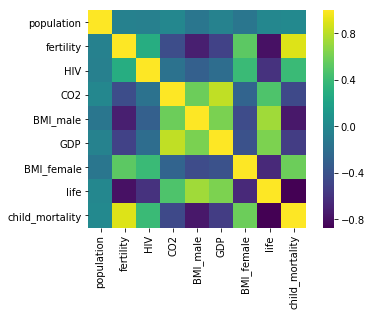

In [0]:
sns.heatmap(df.corr(), square=True, cmap='viridis');

## Linear Regression Problem Defined

As an example, we will explore the corelations between `life` and `fertility`

In [0]:
df_life_fertility = df.loc[ :, ['fertility','life']]

In [0]:
df_life_fertility.describe()

,fertility,life
count,139.000000,139.000000
mean,3.005108,69.602878
std,1.615354,9.122189
min,1.280000,45.200000
25%,1.810000,62.200000
50%,2.410000,72.000000
75%,4.095000,76.850000
max,7.590000,82.600000


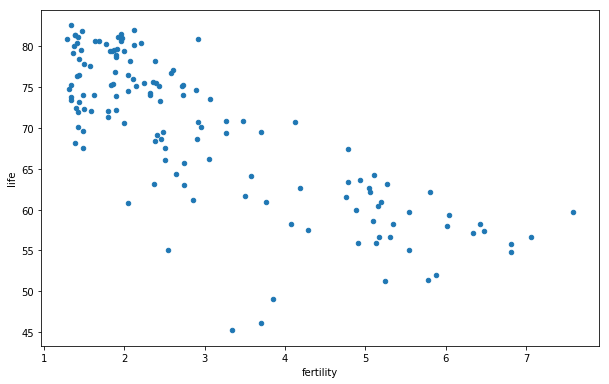

In [0]:
fig, ax = plt.subplots( figsize=(10,6.18) )
df_life_fertility.plot.scatter(x='fertility', y='life', ax=ax);

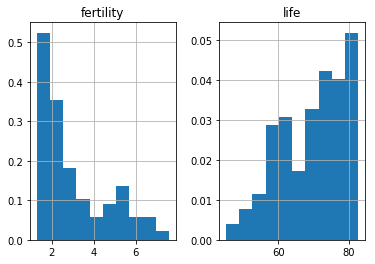

In [0]:
df_life_fertility.hist(density=True);

Here we define the dataframes to be used for the regression models.

In [0]:
X = df[['fertility']]
y = df[['life']]

In [0]:
X.head()

,fertility
0,2.73
1,6.43
2,2.24
3,1.40
4,1.96


In [0]:
y.head()

,life
0,75.3
1,58.3
2,75.5
3,72.5
4,81.5


## Linear Regression

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
linear_all = LinearRegression()

In [0]:
linear_all.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
score_all = linear_all.score(X, y)

In [0]:
y_pred_all = linear_all.predict(X)

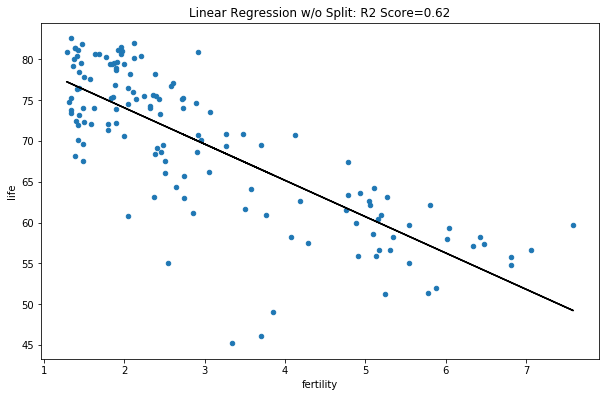

In [0]:
fig, ax = plt.subplots( figsize=(10,6.18) )
df_life_fertility.plot.scatter(x='fertility', y='life', ax=ax)
ax.plot(X, y_pred_all, 'k-')
ax.set_title(f'Linear Regression w/o Split: R2 Score={score_all:.2f}' );

## With Train Test Split

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42 )

In [0]:
linear_split = LinearRegression()

In [0]:
linear_split.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
score_split = linear_split.score(X_test, y_test)

In [0]:
y_pred_split = linear_split.predict(X_test)

Plot out the datasets and the regression results

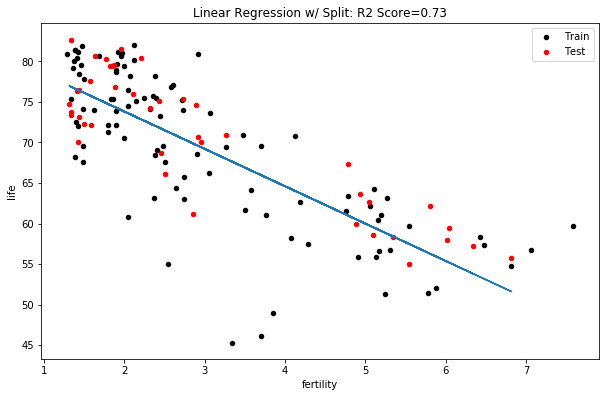

In [0]:
fig, ax = plt.subplots(figsize=FIG_SIZE)

df_train = pd.merge(X_train, y_train, how='left', left_index=True, right_index=True)
df_test = pd.merge(X_test, y_test, how='left', left_index=True, right_index=True)

df_train.plot.scatter(x='fertility', y='life', color = 'k', label='Train', ax=ax)
df_test.plot.scatter(x='fertility', y='life', color = 'r', label='Test', ax=ax)

ax.plot(X_test.values, y_pred_split)
ax.set_title(f'Linear Regression w/ Split: R2 Score={score_split:.2f}' );

## Cross Validation

![alt text](https://camo.githubusercontent.com/3b34dc02333a1a6731137ee4d85f20e94bb0dfa4/68747470733a2f2f692e696d6775722e636f6d2f666b4e6f5656502e706e67)

In [0]:
from sklearn.model_selection import cross_val_score

In [0]:
linear_cross = LinearRegression()

In [0]:
cv_results = cross_val_score(linear_cross, X, y, cv=5)

In [0]:
print(
    cv_results,'\n',
    'Mean of CV R2 Scores: {:.2f}'.format(np.mean(cv_results))
)

[0.71001079 0.75007717 0.55271526 0.547501   0.52410561] 
 Mean of CV R2 Scores: 0.62


## Regularization

**Using ridge method on a 1D linear regression doesn't make any sense. We have to retrieve some high dimensional data first.**

In [0]:
cols = ['life', 'Region']
X_multid = df.drop(cols, axis=1)
y_multid = df[['life']]

Without regularization

In [0]:
linear_multid = LinearRegression()

In [0]:
cv_results_multid = cross_val_score(linear_multid, X_multid, y_multid, cv=5)

In [0]:
print(
    cv_results_multid,'\n',
    'Mean of CV R2 Scores: {:.2f}'.format(np.mean(cv_results_multid))
)

[0.81720569 0.82917058 0.90214134 0.80633989 0.94495637] 
 Mean of CV R2 Scores: 0.86


For Ridge method

In [0]:
from sklearn.linear_model import Ridge

In [0]:
ridge = Ridge(alpha=0.1, normalize=True)

In [0]:
cv_results_ridge = cross_val_score(ridge, X_multid, y_multid, cv=5)
# # or if you really want
# ridge.fit(X_train,y_train)

In [0]:
print(
    cv_results_ridge,'\n',
    'Mean of CV R2 Scores: {:.2f}'.format(np.mean(cv_results_ridge))
)

[0.83960451 0.83001505 0.8997147  0.80825445 0.92366823] 
 Mean of CV R2 Scores: 0.86


Same with Lasso

In [0]:
from sklearn.linear_model import Lasso

In [0]:
lasso = Lasso(alpha=0.1, normalize=True)

In [0]:
cv_results_lasso = cross_val_score(lasso, X_multid, y_multid, cv=5)

In [0]:
print(
    cv_results_lasso,'\n',
    'Mean of CV R2 Scores: {:.2f}'.format(np.mean(cv_results_lasso))
)

[0.85739051 0.78360233 0.85851487 0.83465194 0.8480256 ] 
 Mean of CV R2 Scores: 0.84


## Okay, but what is happening

In [0]:
X_multid_col_names = X_multid.columns

In [0]:
X_multid_col_names

NameError: ignored

In [0]:
lasso_explain = Lasso(alpha=0.1,normalize=True)

In [0]:
lasso_explain_coef = lasso_explain.fit(X_multid, y_multid).coef_

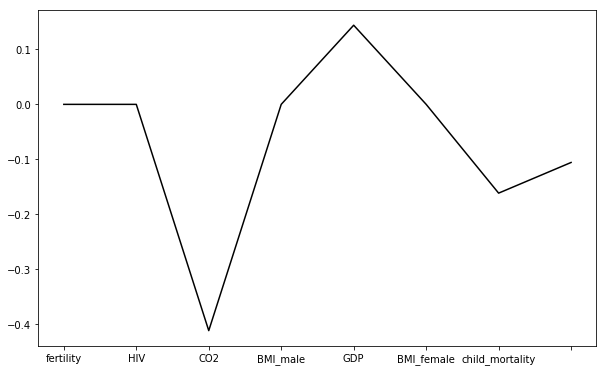

In [0]:
fig, ax = plt.subplots(figsize=FIG_SIZE)

ax.plot( range(len(X_multid_col_names)), lasso_explain_coef, 'k-' )
ax.set_xticklabels( X_multid_col_names );

What about Ridge

In [0]:
ridge_explain = Ridge(alpha=0.1, normalize=True)

In [0]:
ridge_explain_coef = ridge_explain.fit(X_multid, y_multid).coef_

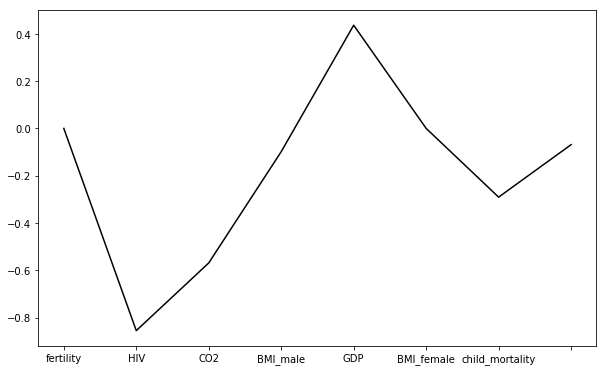

In [0]:
fig, ax = plt.subplots(figsize=FIG_SIZE)

ax.plot( range(len(X_multid_col_names)), ridge_explain_coef[0], 'k-' )
ax.set_xticklabels( X_multid_col_names );

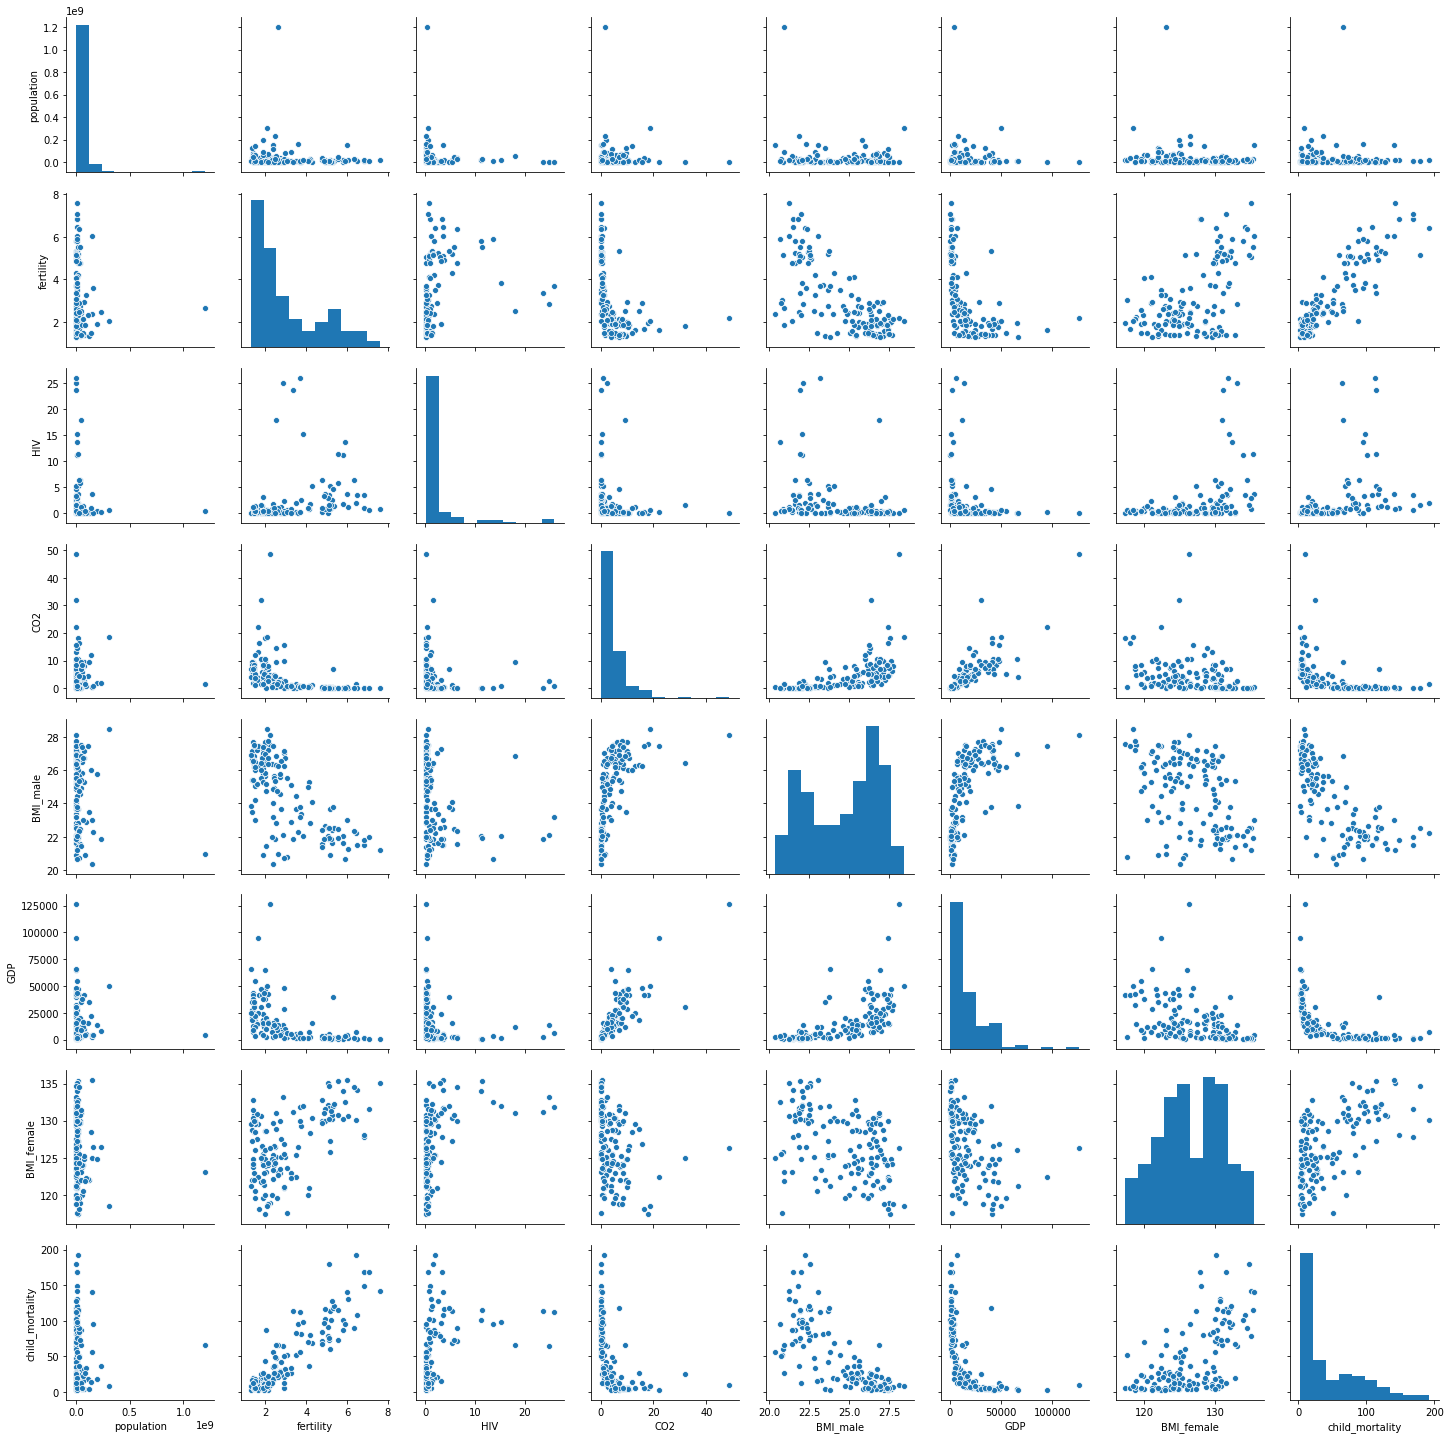

In [0]:
sns.pairplot(X_multid)